In [1]:
# Author: Roi Yehoshua <roiyeho@gmail.com>
# Date: April 2025
# License: MIT

In [2]:
import numpy as np
import matplotlib.pyplot as plt

Two-sided Z-Test

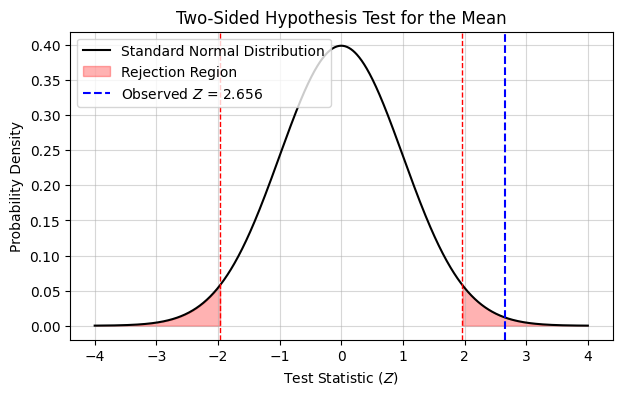

In [3]:
from scipy.stats import norm

# Parameters from the example
mu_null = 200
sample_mean = 204.2
sigma = 10
n = 40
alpha = 0.05

# Standard error and z-value
se = sigma / np.sqrt(n)
z_obs = (sample_mean - mu_null) / se

# Critical z-values for two-sided test
z_crit = norm.ppf(1 - alpha / 2)

# X values for the standard normal distribution
x = np.linspace(-4, 4, 1000)
y = norm.pdf(x)

# Plot
plt.figure(figsize=(7, 4))
plt.plot(x, y, label='Standard Normal Distribution', color='black')

# Shade rejection regions
plt.fill_between(x, y, where=(x <= -z_crit), color='red', alpha=0.3, label='Rejection Region')
plt.fill_between(x, y, where=(x >= z_crit), color='red', alpha=0.3)

# Draw observed z-value
plt.axvline(z_obs, color='blue', linestyle='--', linewidth=1.5, label=f'Observed $Z$ = {z_obs:.3f}')
plt.axvline(-z_crit, color='red', linestyle='--', linewidth=1)
plt.axvline(z_crit, color='red', linestyle='--', linewidth=1)

plt.title('Two-Sided Hypothesis Test for the Mean')
plt.xlabel('Test Statistic ($Z$)')
plt.ylabel('Probability Density')
plt.legend(loc='upper left')
plt.grid(alpha=0.5)
plt.savefig('figures/two_sided_z_test.pdf')

One-sided T-Test

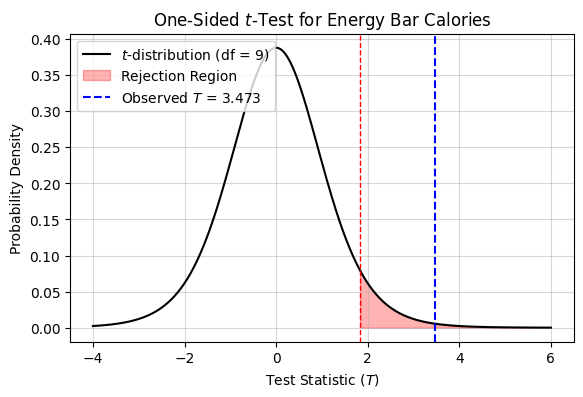

In [4]:
from scipy.stats import t

# Parameters for the one-sided t-test
n = 10
df = n - 1
sample_mean = 204.2
mu_0 = 200
s = 3.824
alpha = 0.05

# Compute test statistic and critical value
se = s / np.sqrt(n)
t_obs = (sample_mean - mu_0) / se
t_crit = t.ppf(1 - alpha, df)

# x values for the t-distribution
x = np.linspace(-4, 6, 1000)
y = t.pdf(x, df)

# Plot
plt.figure(figsize=(6.5, 4))
plt.plot(x, y, label=f'$t$-distribution (df = {df})', color='black')

# Shade rejection region
plt.fill_between(x, y, where=(x >= t_crit), color='red', alpha=0.3, label='Rejection Region')

# Observed t-statistic
plt.axvline(t_obs, color='blue', linestyle='--', linewidth=1.5, label=f'Observed $T$ = {t_obs:.3f}')
plt.axvline(t_crit, color='red', linestyle='--', linewidth=1)

plt.title('One-Sided $t$-Test for Energy Bar Calories')
plt.xlabel('Test Statistic ($T$)')
plt.ylabel('Probability Density')
plt.legend(loc='upper left')
plt.grid(alpha=0.5)
plt.savefig('figures/one_sided_t_test.pdf')

Wilcoxon Signed-Rank Test

In [5]:
from scipy.stats import wilcoxon

# Accuracy values for algorithms A and B
A = [0.812, 0.784, 0.761, 0.803, 0.792, 0.765, 0.811, 0.774, 0.781, 0.798]
B = [0.826, 0.791, 0.755, 0.812, 0.805, 0.778, 0.809, 0.786, 0.775, 0.810]

# Perform one-sided Wilcoxon signed-rank test (B > A)
statistic, p_value = wilcoxon(B, A, alternative='greater')

print(f"W+ = {statistic}, p-value = {p_value:.4f}")

W+ = 49.0, p-value = 0.0137


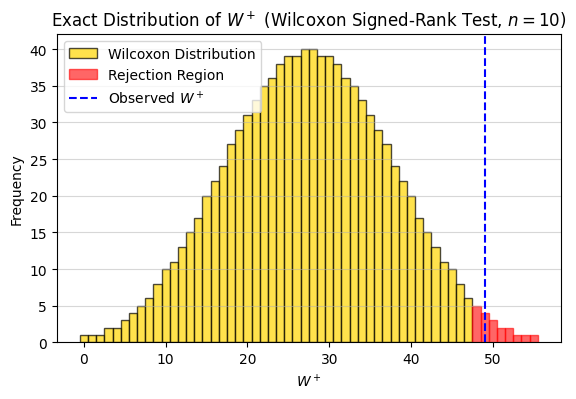

In [6]:
from itertools import combinations
from matplotlib.patches import Patch

# Number of nonzero differences
n = 10
T_max = n * (n + 1) // 2

# Generate all sign combinations
ranks = np.arange(1, n + 1)
all_signs = [np.array(s) for s in np.ndindex(*(2,) * n)]
signed_rank_sums = [np.sum(ranks * (2 * s - 1)) for s in all_signs]  # convert (0,1) to (-1,1)

# Convert to W+ values
W_plus_vals = [(T_max + sr_sum) // 2 for sr_sum in signed_rank_sums]
unique, counts = np.unique(W_plus_vals, return_counts=True)

# Observed W+
W_plus_obs = 49
W_crit = 8
rejection_threshold = T_max - W_crit + 1

# Plot distribution of W+
plt.figure(figsize=(6.5, 4))
bars = plt.bar(unique, counts, width=1, color='gold', edgecolor='black', alpha=0.7, label='Wilcoxon Distribution')
plt.axvline(W_plus_obs, color='blue', linestyle='--', linewidth=1.5, label=f'Observed $W^+ = {W_plus_obs}$')

# Highlight rejection region bars precisely
for bar, w in zip(bars, unique):
    if w >= rejection_threshold:
        bar.set_color('red')
        bar.set_alpha(0.6)

# Custom legend handles
rejection_patch = Patch(color='red', alpha=0.6, label='Rejection Region')
observed_line = plt.Line2D([], [], color='blue', linestyle='--', linewidth=1.5, label='Observed $W^+$')
distribution_patch = Patch(facecolor='gold', edgecolor='black', alpha=0.7, label='Wilcoxon Distribution')
plt.legend(handles=[distribution_patch, rejection_patch, observed_line])
        
plt.title('Exact Distribution of $W^+$ (Wilcoxon Signed-Rank Test, $n = 10$)')
plt.xlabel('$W^+$')
plt.ylabel('Frequency')
plt.grid(alpha=0.5, axis='y')
plt.savefig('figures/wilcoxon_test.pdf')